<a href="https://colab.research.google.com/github/DiantoroKadarman/PCVK_Ganjil_2024/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan: 50


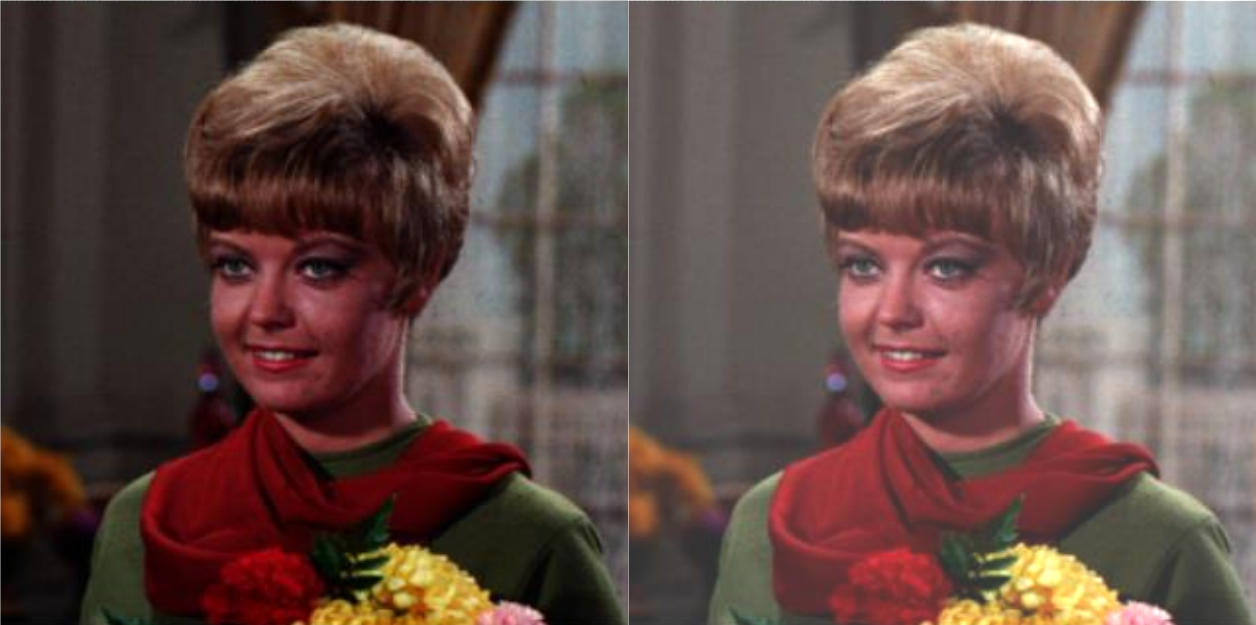

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

print(' Mengubah tingkat kecerahan citra')
print('---------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/gambar1.png')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image [y,x,c] = np.clip(original [y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image cv.convertScaleAbs (original, beta-brightness)
final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# TUGAS PRAKTIKUM

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori

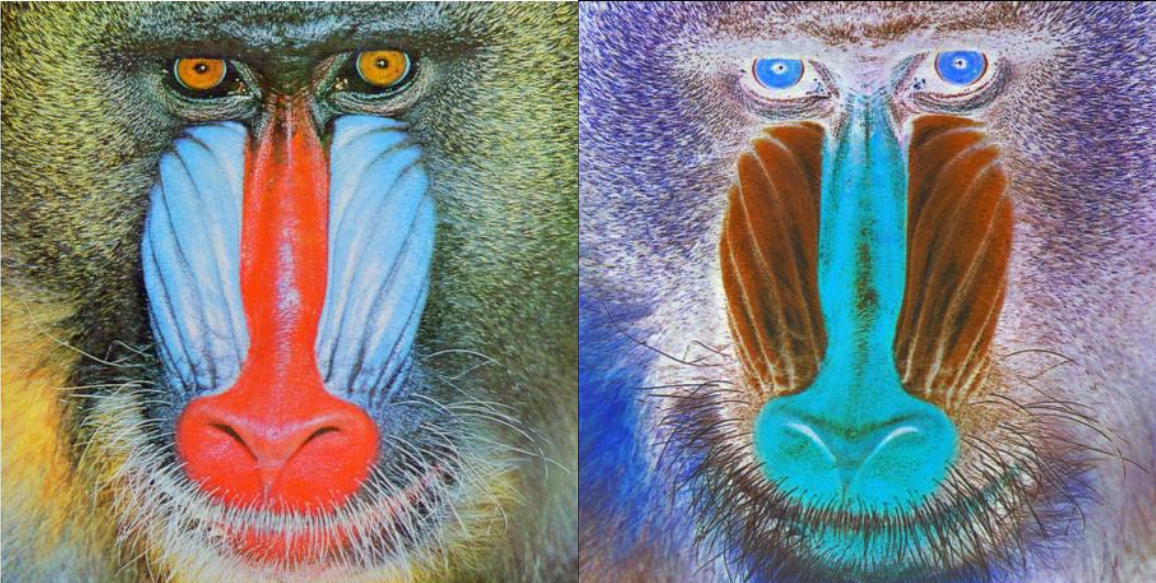

In [6]:
img = cv.imread('/content/drive/MyDrive/PCVK/gambar2.png')

inverted_img = 255 - img

final_frame = cv.hconcat((img, inverted_img))
cv2_imshow(final_frame)


2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan Tingkat Kecerahan [-255 - 255] : 60
Masukkan Kontras [1.0 - 3.0] : 1.5


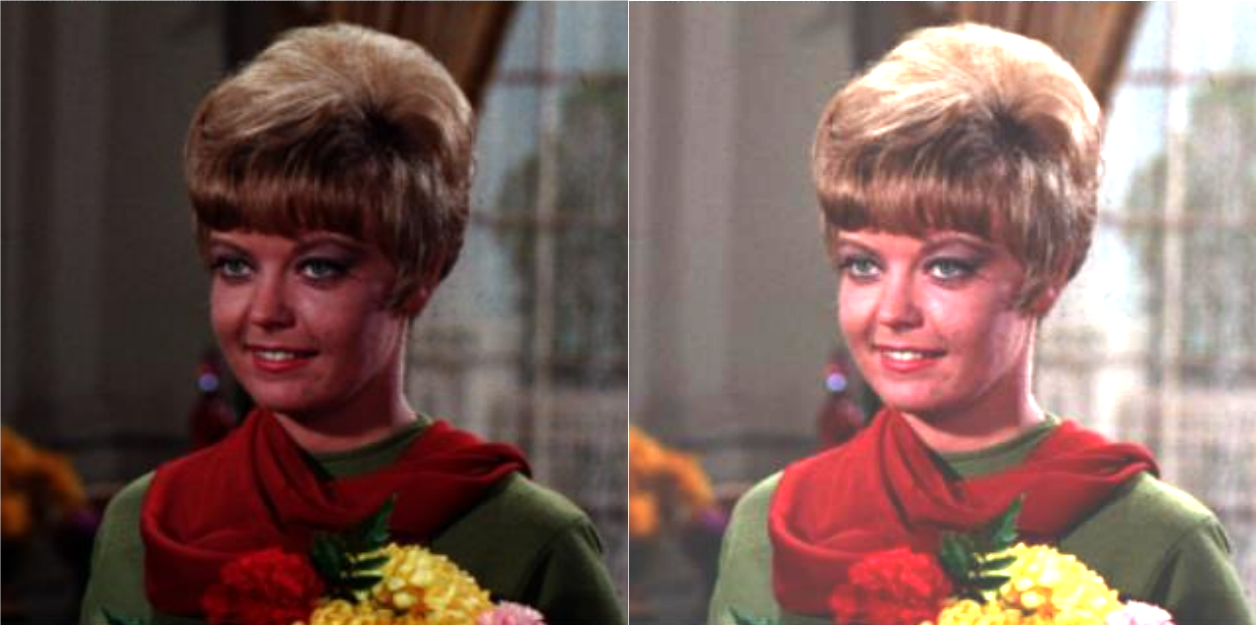

In [9]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')

try:
  brightness = int(input('Masukkan Tingkat Kecerahan [-255 - 255] : '))
  contrast = float(input('Masukkan Kontras [1.0 - 3.0] : '))

except ValueError:
  print('Error, not a number')

original= cv.imread('/content/drive/MyDrive/PCVK/gambar1.png')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip( contrast * original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original,brightness_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log

Mengubah tingkat kecerahan citra dengan trasnformasi log
--------------------------------
Masukkan nilai kecerahan : 40


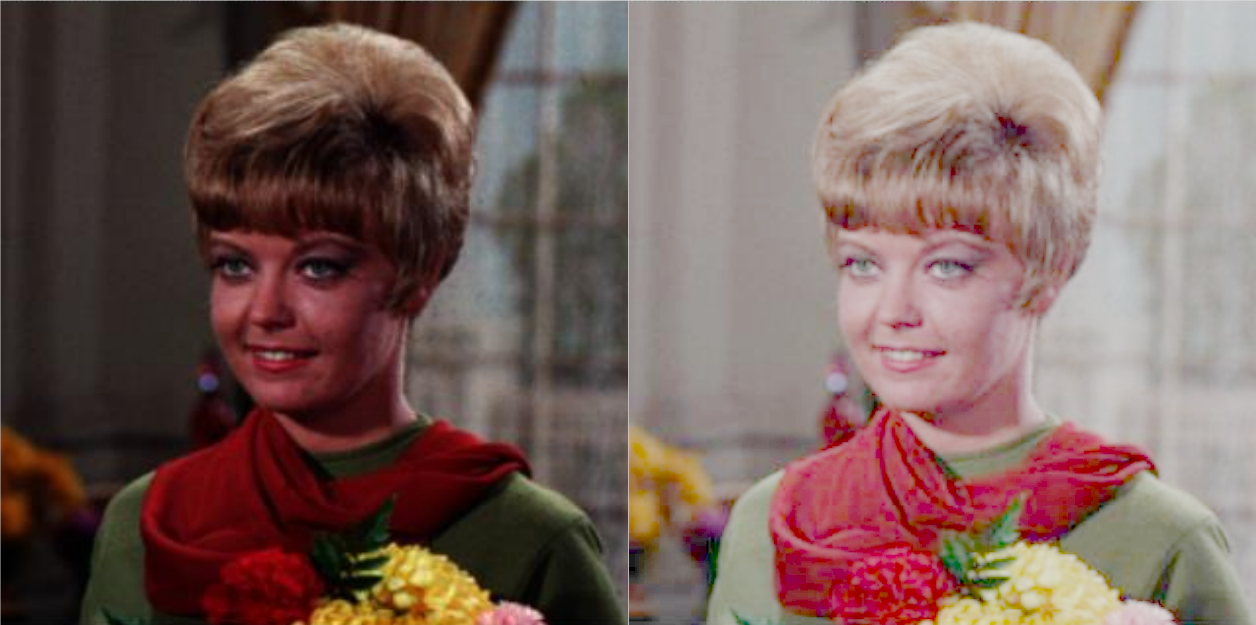

In [10]:
print('Mengubah tingkat kecerahan citra dengan trasnformasi log')
print('--------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan : '))

except ValueError:
  print('Error, not a number')

original= cv.imread('/content/drive/MyDrive/PCVK/gambar1.png')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip( brightness * np.log((1 + original[y,x,c])), 0, 255)

final_frame = cv.hconcat((original,brightness_image))
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori

Original


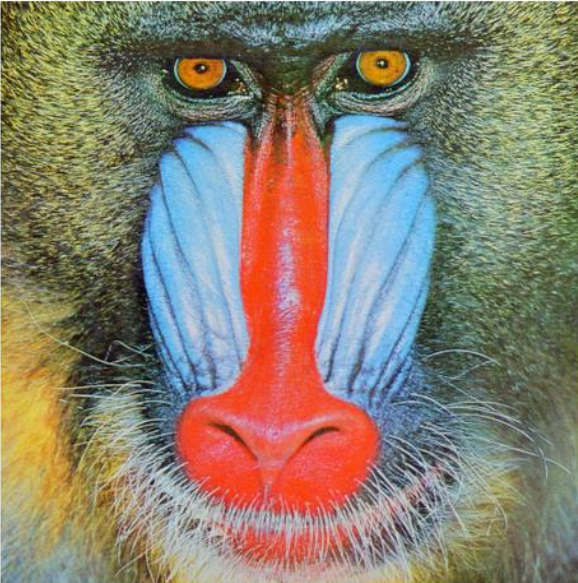


Averaging


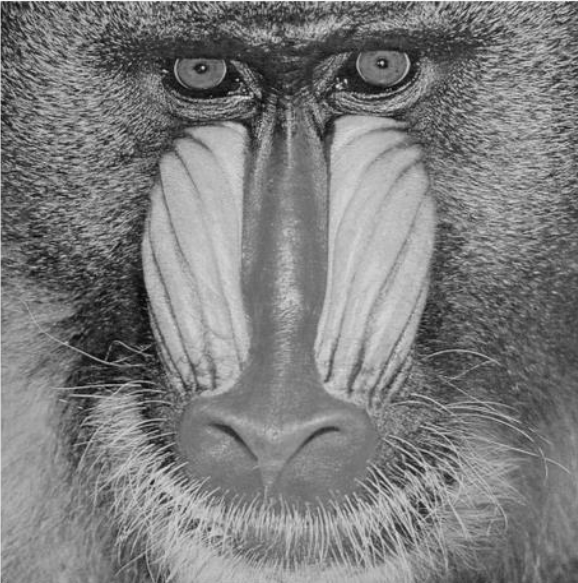


Lightness


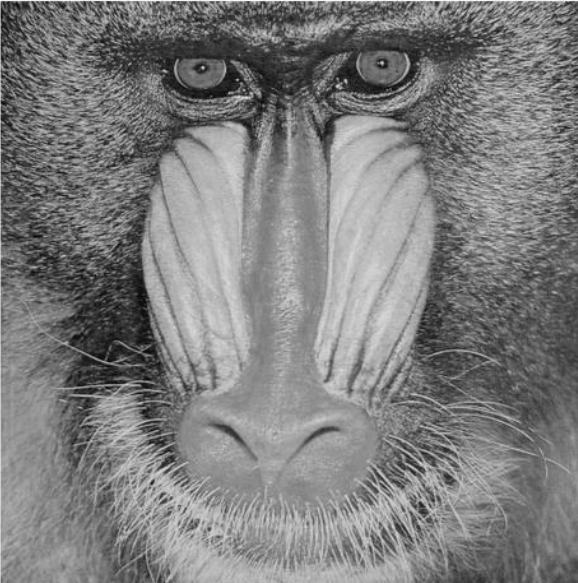


Luminance


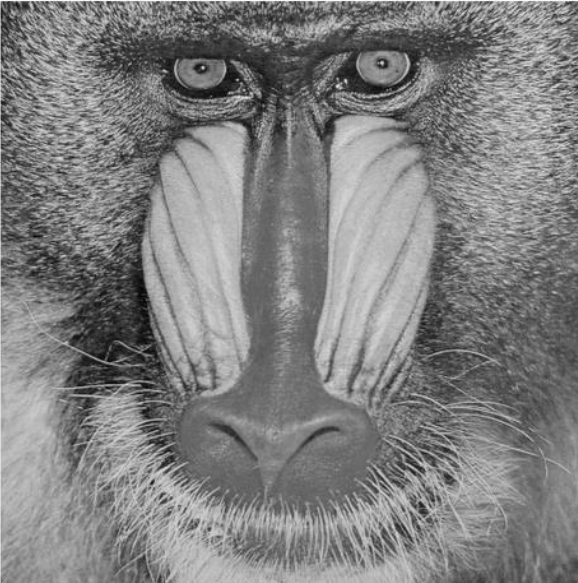

In [16]:
img_ori = cv.imread('/content/drive/MyDrive/PCVK/gambar2.png')
img_ori = cv.resize(img_ori, (300, 300))
brightness_image = np.zeros(img_ori.shape, img_ori.dtype)

# Averaging
gray_avg = np.mean(img_ori, axis=2)

# Lightness
gray_lightness = np.max(img_ori, axis=2) / 2 + np.min(img_ori, axis=2) / 2

# Luminance
gray_luminance = 0.21 * img_ori[:, :, 2] + 0.72 * img_ori[:, :, 1] + 0.07 * img_ori[:, :, 0]

# Convert grayscale images to 3 channels
gray_avg = cv.cvtColor(gray_avg.astype(np.uint8), cv.COLOR_GRAY2BGR)
gray_lightness = cv.cvtColor(gray_lightness.astype(np.uint8), cv.COLOR_GRAY2BGR)
gray_luminance = cv.cvtColor(gray_luminance.astype(np.uint8), cv.COLOR_GRAY2BGR)

print('Original')
cv2_imshow(img_ori)
print('\nAveraging')
cv2_imshow(gray_avg)
print('\nLightness')
cv2_imshow(gray_lightness)
print('\nLuminance')
cv2_imshow(gray_luminance)

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale

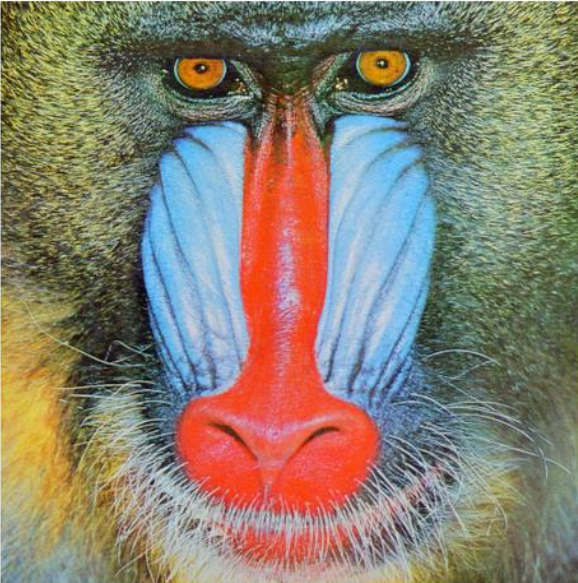

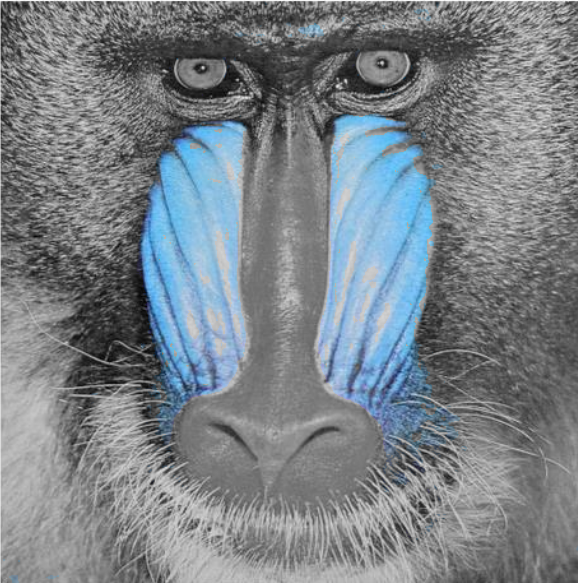

In [15]:
img = cv.imread('/content/drive/MyDrive/PCVK/gambar2.png')

# Ubah ke HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Tentukan rentang warna biru di HSV
lower_blue = np.array([100,50,50])
upper_blue = np.array([130,255,255])

# Ambil mask untuk warna biru
mask = cv.inRange(hsv, lower_blue, upper_blue)

# Terapkan mask ke gambar asli
res = cv.bitwise_and(img,img, mask= mask)

# Ubah gambar asli ke grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Ubah gambar grayscale ke BGR
gray_bgr = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# Gabungkan bagian biru dan bagian grayscale
result = np.where(res != 0, res, gray_bgr)

#Gambar Ori
cv2_imshow(img)

# hasil
cv2_imshow(result)